# Miniproject - Neuroscience: cellular and circuit mechanisms (BIO-482)

- This notebook produces the figures for **part 4** of the miniproject.

#### Importing libraries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats
#%matplotlib widget
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Importing helper functions
 Feel free to check out what these functions do in the corresponding files, `helpers.py` or `utils.py`. 
 - `helpers.py` contains functions to analyze membrane potential recording data
 - `utils.py` contains functions useful for other things e.g. plotting

In [2]:
base_path = os.getcwd()
base_path = base_path.replace('notebooks', 'scripts') # note: if you have notebooks twice in your base_path, this won't work
sys.path.insert(1, base_path)

from helpers import *
from utils import remove_top_right_frame, jitter_scatterplot

# Test

# Load data
Load the data as `.pkl` file (saved from previous part):

In [ ]:
# Make paths
main_dir = r"C:\Users\Gauthier Huguelet\OneDrive - epfl.ch\EPFL\MA1\Cell and circuit mech of brain fct\miniproject\BIO482_MiniProject_2025_Python" # EDIT the path !!!!!!!
print('Main working directory:', main_dir)
figure_path = os.path.join(main_dir, 'Figures')
os.makedirs(figure_path, exist_ok=True)
data_path = os.path.join(main_dir, 'Data') 
results_path = os.path.join(main_dir, 'Results')
fname = 'data_bio482.pkl'
data_df = pd.read_pickle(os.path.join(data_path, fname))

Main working directory: C:\Users\Gauthier Huguelet\OneDrive - epfl.ch\EPFL\MA1\Cell and circuit mech of brain fct\miniproject\BIO482_MiniProject_2025_Python


In [4]:
data_df.head()

,Cell_APThreshold_Slope,Cell_Anatomy,Cell_Counter,Cell_Depth,Cell_ID,Cell_Layer,Cell_TargetedBrainArea,Cell_Type,Cell_tdTomatoExpressing,Mouse_DateOfBirth,...,Sweep_Counter,Sweep_MembranePotential,Sweep_MembranePotential_SamplingRate,Sweep_PassiveContactTimes,Sweep_QuietTimes,Sweep_StartTime,Sweep_Type,Sweep_WhiskerAngle,Sweep_WhiskerAngle_SamplingRate,Sweep_WhiskingTimes
0,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,1.0,"[-0.044009375, -0.044028125, -0.0439875, -0.04...",20000.0,"[[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...","[[0.002, 4.564], [4.606, 6.09], [14.634, 15.52...",2005.0,active touch,"[2.740000000000009, 2.740000000000009, 2.74000...",100.0,"[[6.118, 6.326], [7.942, 13.856]]"
1,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,2.0,"[-0.046275, -0.04629375, -0.046259375, -0.0462...",20000.0,"[[15.274999999999999, 15.375], [16.247, 16.643...","[[0.002, 4.496], [5.558, 6.626], [13.406, 15.2...",2005.0,active touch,"[2.680000000000007, 2.680000000000007, 2.68000...",100.0,"[[4.7, 5.196], [6.696, 11.15], [12.032, 13.006..."
2,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,3.0,"[-0.041896875, -0.0419125, -0.041909375, -0.04...",20000.0,"[[4.347000000000001, 7.0390000000000015], [8.2...","[[0.002, 2.128], [6.252, 7.01], [7.15, 20.0]]",2005.0,passive contact,"[1.4958937492820894, 1.5019819900587095, 1.509...",100.0,"[[2.15, 3.652], [4.362, 5.848]]"
3,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,4.0,"[-0.04655625, -0.0465875, -0.046575, -0.046596...",20000.0,nan,"[[0.002, 2.764], [12.03, 14.464], [14.814, 15....",2005.0,active touch,"[2.467493802679826, 2.459711310964792, 2.46562...",100.0,"[[2.766, 12.026], [15.626, 18.406], [18.814, 1..."
4,10.0,L2/3;C2,1.0,229.0,SC901_1,L2/3,C2,EXC,False,NaN,...,5.0,"[-0.047296875, -0.047284375, -0.047265625, -0....",20000.0,"[[4.411000000000001, 4.4809999999999945], [5.2...","[[0.002, 3.36], [3.57, 4.424], [4.48, 5.224], ...",2005.0,active touch,"[2.4399999999999977, 2.4399999999999977, 2.440...",100.0,"[[5.228, 5.624], [7.462, 8.022], [11.002, 15.2..."


In [5]:

cell_list = sorted(np.unique(data_df.Cell_ID), reverse=True)
print(np.size(cell_list))

240


In [6]:
r_p1name = 'Part1_Results.csv'
results_p1 = pd.read_csv(os.path.join(results_path,r_p1name),sep=';',index_col=0)
r_p2name = 'Part2_Results.csv'
results_p2 = pd.read_csv(os.path.join(results_path,r_p2name),sep=';',index_col=0)
r_p3name = 'Part3_Results.csv'
results_p3 = pd.read_csv(os.path.join(results_path,r_p3name),sep=';',index_col=0)

In [77]:
results_final = results_p1.merge(results_p2[['cell_id', 'delta_vm','delta_ap']], on='cell_id', how='right')


# Preprocessing

In [78]:
#remove Nana values
results_final.dropna(axis=0,inplace=True)
#create features matrix and label matrix
feature_matrix = results_final.drop(columns=['cell_type','cell_id'])
label_matrix = results_final['cell_type']
# create train/test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_matrix,label_matrix,test_size = 0.3,stratify = label_matrix, random_state=42
    )
# standardize based on training data only
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report
)
#create the models : 
Lr = LogisticRegression(
    random_state=42
)
Rfc = RandomForestClassifier(
    random_state =42
    )
Gbc = GradientBoostingClassifier(
    random_state= 42
)


#Fit the models :
Lr.fit(X_train,y_train)
Rfc.fit(X_train,y_train)
Gbc.fit(X_train,y_train)

#print out scores :
print("LogisticRegression score : ",Lr.score(X_test,y_test))
print("RandomForestClassifier score : ",Rfc.score(X_test,y_test))
print("GradientBoostingClassifier score : ",Gbc.score(X_test,y_test))


LogisticRegression score :  0.8382352941176471
RandomForestClassifier score :  0.8382352941176471
GradientBoostingClassifier score :  0.8823529411764706


# Evaluation Metrics
- Overall accuracy
- Per-class precision, recall, F1
- Confusion Matrix
- Balanced accuracy
- CV 5-fold

**************************************************
LogisticRegression :
**************************************************
 - accuracy: 0.8382352941176471
 - balanced accuracy: 0.7429761904761905

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.923 |    0.960 |      0.941 |    25.000 |
| PV           |       0.857 |    0.857 |      0.857 |    14.000 |
| SST          |       0.760 |    0.905 |      0.826 |    21.000 |
| VIP          |       0.667 |    0.250 |      0.364 |     8.000 |
| accuracy     |       0.838 |    0.838 |      0.838 |     0.838 |
| macro avg    |       0.802 |    0.743 |      0.747 |    68.000 |
| weighted avg |       0.829 |    0.838 |      0.820 |    68.000 |


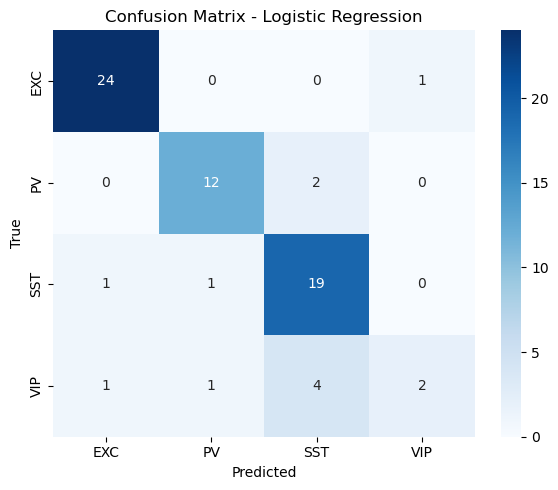


 - confusion matrix:
 [[24  0  0  1]
 [ 0 12  2  0]
 [ 1  1 19  0]
 [ 1  1  4  2]]
**************************************************
RandomForest :
**************************************************
 - accuracy: 0.8382352941176471
 - balanced accuracy: 0.7623214285714286

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.960 |    0.960 |      0.960 |    25.000 |
| PV           |       0.800 |    0.857 |      0.828 |    14.000 |
| SST          |       0.720 |    0.857 |      0.783 |    21.000 |
| VIP          |       1.000 |    0.375 |      0.545 |     8.000 |
| accuracy     |       0.838 |    0.838 |      0.838 |     0.838 |
| macro avg    |       0.870 |    0.762 |      0.779 |    68.000 |
| weighted avg |       0.858 |    0.838 |      0.829 |    68.000 |


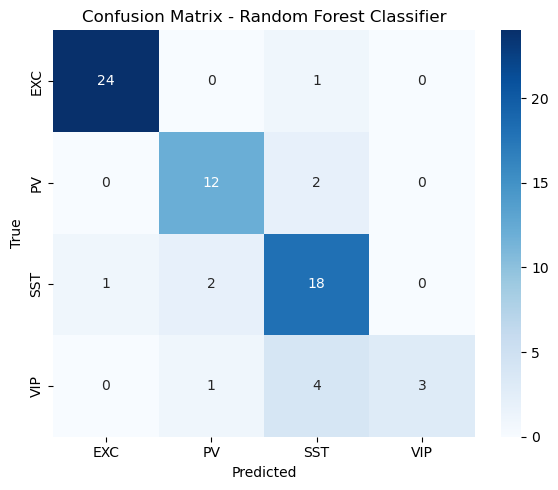


 - confusion matrix:
 [[24  0  1  0]
 [ 0 12  2  0]
 [ 1  2 18  0]
 [ 0  1  4  3]]
**************************************************
GradientBoosting :
**************************************************
 - accuracy: 0.8823529411764706
 - balanced accuracy: 0.8422619047619048

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.962 |    1.000 |      0.980 |    25.000 |
| PV           |       0.833 |    0.714 |      0.769 |    14.000 |
| SST          |       0.792 |    0.905 |      0.844 |    21.000 |
| VIP          |       1.000 |    0.750 |      0.857 |     8.000 |
| accuracy     |       0.882 |    0.882 |      0.882 |     0.882 |
| macro avg    |       0.897 |    0.842 |      0.863 |    68.000 |
| weighted avg |       0.887 |    0.882 |      0.880 |    68.000 |


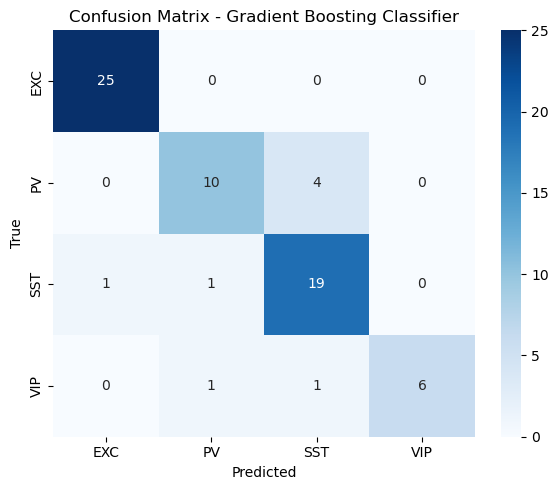


 - confusion matrix:
 [[25  0  0  0]
 [ 0 10  4  0]
 [ 1  1 19  0]
 [ 0  1  1  6]]


In [84]:
#more in depth metrics : 
classes = ["EXC", "PV", "SST", "VIP"]
# Predictions
y_pred_lr = Lr.predict(X_test)
y_pred_rfc = Rfc.predict(X_test)
y_pred_gbc = Gbc.predict(X_test)

print("*"*50+"\nLogisticRegression :\n"+"*"*50)
print(" - accuracy:", accuracy_score(y_test, y_pred_lr))
print(" - balanced accuracy:", balanced_accuracy_score(y_test, y_pred_lr))
report_lr = classification_report(y_test, y_pred_lr,output_dict=True)
report_lr_df = pd.DataFrame(report_lr).transpose()
print("\n - classification report:\n", report_lr_df.to_markdown(floatfmt=".3f"))
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()
print("\n - confusion matrix:\n", cm_lr)

print("*"*50+"\nRandomForest :\n"+"*"*50)
print(" - accuracy:", accuracy_score(y_test, y_pred_rfc))
print(" - balanced accuracy:", balanced_accuracy_score(y_test, y_pred_rfc))
report_rfc = classification_report(y_test, y_pred_rfc,output_dict=True)
report_rfc_df = pd.DataFrame(report_rfc).transpose()
print("\n - classification report:\n", report_rfc_df.to_markdown(floatfmt=".3f"))
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rfc, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Random Forest Classifier")
plt.tight_layout()
plt.show()
print("\n - confusion matrix:\n", cm_rfc)

print("*"*50+"\nGradientBoosting :\n"+"*"*50)
print(" - accuracy:", accuracy_score(y_test, y_pred_gbc))
print(" - balanced accuracy:", balanced_accuracy_score(y_test, y_pred_gbc))
report_gbc = classification_report(y_test, y_pred_gbc,output_dict=True)
report_gbc_df = pd.DataFrame(report_gbc).transpose()
print("\n - classification report:\n", report_gbc_df.to_markdown(floatfmt=".3f"))

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(6,5))
sns.heatmap(cm_gbc, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Gradient Boosting Classifier")
plt.tight_layout()
plt.show()
print("\n - confusion matrix:\n", cm_gbc)

From the first easiest try, it seems that the Gradient Boosting Classifier is the most promising one.

# Hyperparameter tuning 
Let's try to get better results with different parameters for a Gradient Boosting Classifier

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    "n_estimators": randint(200, 800),
    "max_depth": [None, 10, 20, 30],
    "learning_rate": scipy.stats.uniform(0.01, 0.3),
}

clf = RandomizedSearchCV(
    GradientBoostingClassifier(),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    n_jobs=-1,
    verbose=2,
)
clf.fit(X_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,GradientBoostingClassifier()
,param_distributions,"{'learning_rate': <scipy.stats....00194637CEA50>, 'max_depth': [None, 10, ...], 'n_estimators': <scipy.stats....00195519B8D60>}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [65]:
GBC_best = clf.best_estimator_
y_pred_gbc_best = GBC_best.predict(X_test)

print("*"*50+"\nBest GradientBoosting after RandomizedSearchCV:\n"+"*"*50)
print(" - accuracy:", accuracy_score(y_test, y_pred_gbc_best))
print(" - balanced accuracy:", balanced_accuracy_score(y_test, y_pred_gbc_best))
report_gbc_best = classification_report(y_test, y_pred_gbc_best,output_dict=True)
report_gbc_best_df = pd.DataFrame(report_gbc_best).transpose()
print("\n - classification report:\n", report_gbc_best_df.to_markdown(floatfmt=".3f"))
print("\n - confusion matrix:\n", confusion_matrix(y_test, y_pred_gbc_best))

**************************************************
Best GradientBoosting after RandomizedSearchCV:
**************************************************
 - accuracy: 0.8529411764705882
 - balanced accuracy: 0.8456547619047619

 - classification report:
 |              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| EXC          |       0.889 |    0.960 |      0.923 |    25.000 |
| PV           |       0.786 |    0.786 |      0.786 |    14.000 |
| SST          |       0.842 |    0.762 |      0.800 |    21.000 |
| VIP          |       0.875 |    0.875 |      0.875 |     8.000 |
| accuracy     |       0.853 |    0.853 |      0.853 |     0.853 |
| macro avg    |       0.848 |    0.846 |      0.846 |    68.000 |
| weighted avg |       0.852 |    0.853 |      0.851 |    68.000 |

 - confusion matrix:
 [[24  0  1  0]
 [ 0 11  2  1]
 [ 3  2 16  0]
 [ 0  1  0  7]]


#### Clear performance decrease after tuning. Why ?
The tuned RandomForest performs worse than the default model because the dataset is small and highly imbalanced (only 7 VIP samples). With 5-fold cross-validation, some folds contain almost no VIP neurons, making the tuning process unstable and noisy. The large search space then overfits these noisy folds, leading to hyperparameters that generalize worse—especially for the minority class.
In this case, the default RandomForest is more stable and performs better.